In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Nos variables : 
- **target**: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
- **ids**: The id of the tweet ( 2087)
- **date**: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
- **flag**: The query (lyx). If there is no query, then this value is NO_QUERY.
- **user**: the user that tweeted (robotickilldozr)
- **text**: the text of the tweet (Lyx is cool)

In [14]:
#importation des données
columns=['target', 'ids', 'date', 'flag', 'user', 'text']
df = pd.read_csv("training.1600000.processed.noemoticon.csv", sep=',', encoding='latin1', names=columns)

In [15]:
df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [17]:
df.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [19]:
df = df[['target', 'text']]
df

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [20]:
df["target"].unique()

array([0, 4])

In [21]:
df.loc[df['target']==4, 'target']=1
df["target"].unique()

array([0, 1])

In [22]:
target_count = df["target"].value_counts()
target_count

target
0    800000
1    800000
Name: count, dtype: int64

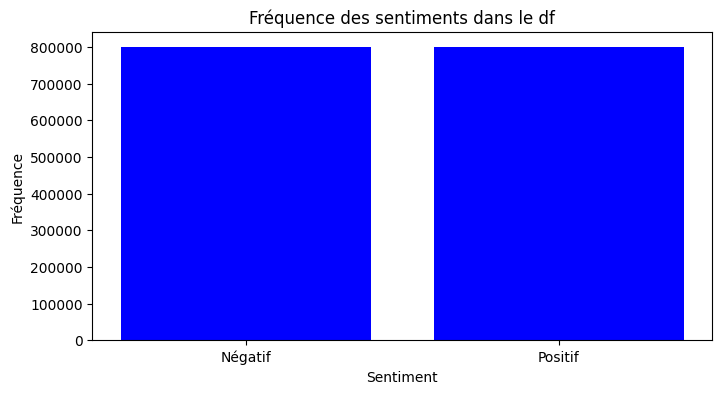

In [23]:
plt.figure(figsize=(8,4))
plt.bar(target_count.index, target_count.values, color="blue")
plt.title("Fréquence des sentiments dans le df")
plt.xlabel("Sentiment")
plt.ylabel("Fréquence")
plt.xticks(target_count.index, ["Négatif", "Positif"]) # 0 = négatif / 4 = positif
plt.show()

In [24]:
# Vu le volume de la base de donnée, on va sélectionné 20 000 tweets positifs et 20 000 tweets négatif
positifs_tweets = df[df['target']==1].sample(n=20000, random_state=42)
negatifs_tweets= df[df['target']==0].sample(n=20000, random_state=42)

df_seletionne = pd.concat([positifs_tweets, negatifs_tweets])
df_seletionne = df_seletionne.reset_index(drop=True)

In [25]:
df_seletionne

,target,text
0,1,Is lookin 4ward to a long weekend really dont...
1,1,#myweakness Is music and i live to meet the p...
2,1,figured out the Internet on my new iPod
3,1,@hillsongunited can't wait to worship with you...
4,1,@sillybeggar Congrats James !! I'm sure the bo...
...,...,...
39995,0,I have a question to all men out there who are...
39996,0,@jenndoll it sucks
39997,0,My remaining hens were slaughtered my foxes la...
39998,0,@JohnFinn of course we were at 145am! jordens ...


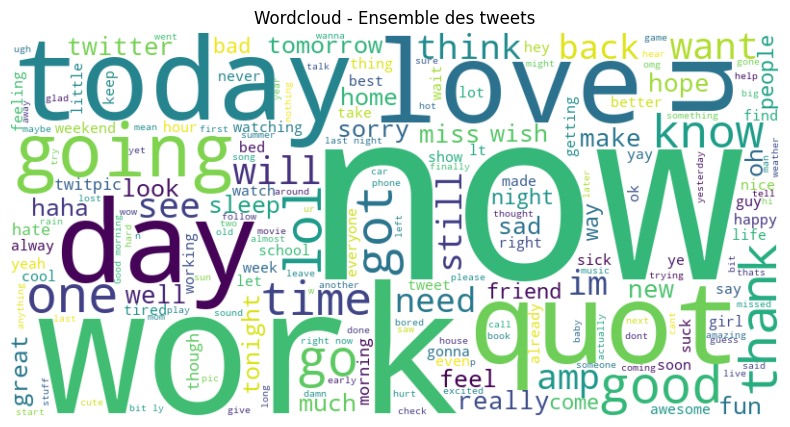

In [26]:
# Afficher les mots les plus cités dans la df.selectionne
all_texts = "".join(df_seletionne["text"])
all_worldcloud = WordCloud(width=800,height=400, background_color="white").generate(all_texts)

plt.figure(figsize=(10,5))
plt.imshow(all_worldcloud, interpolation="bilinear")
plt.title("Wordcloud - Ensemble des tweets")
plt.axis("off")
plt.show()

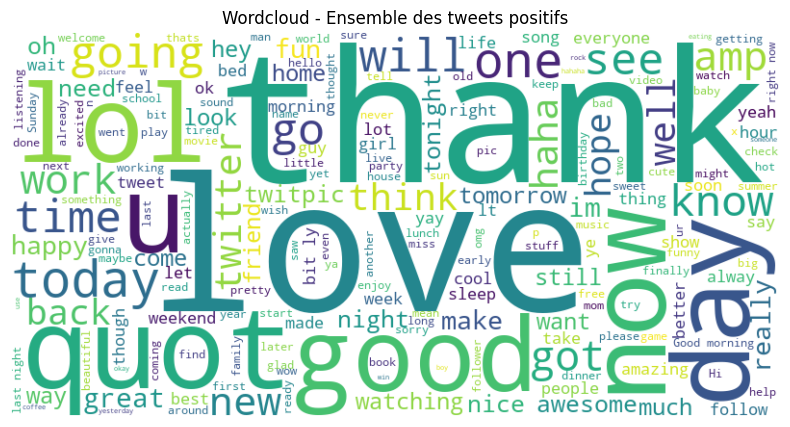

In [27]:
#afficher les mots les plus cités parmi les tweets positifs
positif_text = "".join(positifs_tweets["text"])
positif_wordcloud = WordCloud(width=800,height=400,background_color="white").generate(positif_text)

plt.figure(figsize=(10,5))
plt.imshow(positif_wordcloud, interpolation='bilinear')
plt.title("Wordcloud - Ensemble des tweets positifs")
plt.axis('off')
plt.show()

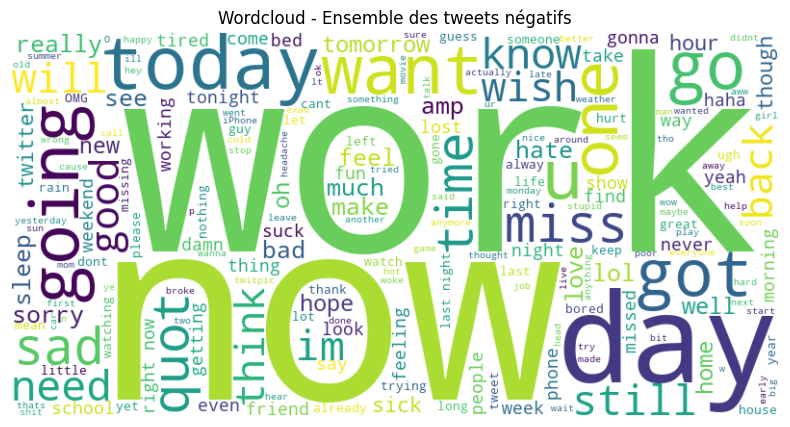

In [28]:
#afficher les mots les plus cités parmi les tweets negatifs
negatif_text = "".join(negatifs_tweets["text"])
negatif_wordcloud = WordCloud(width=800,height=400,background_color="white").generate(negatif_text)

plt.figure(figsize=(10,5))
plt.imshow(negatif_wordcloud, interpolation='bilinear')
plt.title("Wordcloud - Ensemble des tweets négatifs")
plt.axis('off')
plt.show()